In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier 

In [59]:
df=pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [60]:
df.shape

(1197, 15)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [62]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [63]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

<Figure size 1600x800 with 0 Axes>

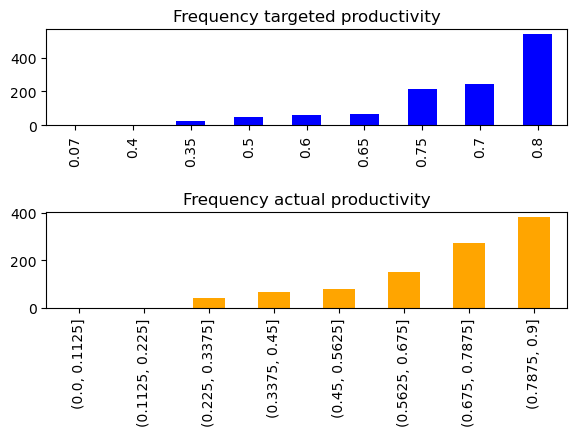

In [64]:
bins=pd.interval_range(0,1, freq=0.10)
counts=pd.cut(df["actual_productivity"], bins)
intervals=pd.Series(counts)
plt.figure(figsize=(16,8))
fig, ax= plt.subplots(2)
df["targeted_productivity"].value_counts().sort_values(ascending=True).plot.bar(color="blue",ax=ax[0])
intervals.value_counts().sort_values(ascending=True).plot.bar(color="orange", ax=ax[1])
fig.tight_layout(pad=3)
ax[0].set_title("Frequency targeted productivity")
ax[1].set_title("Frequency actual productivity")
plt.show()

<AxesSubplot:>

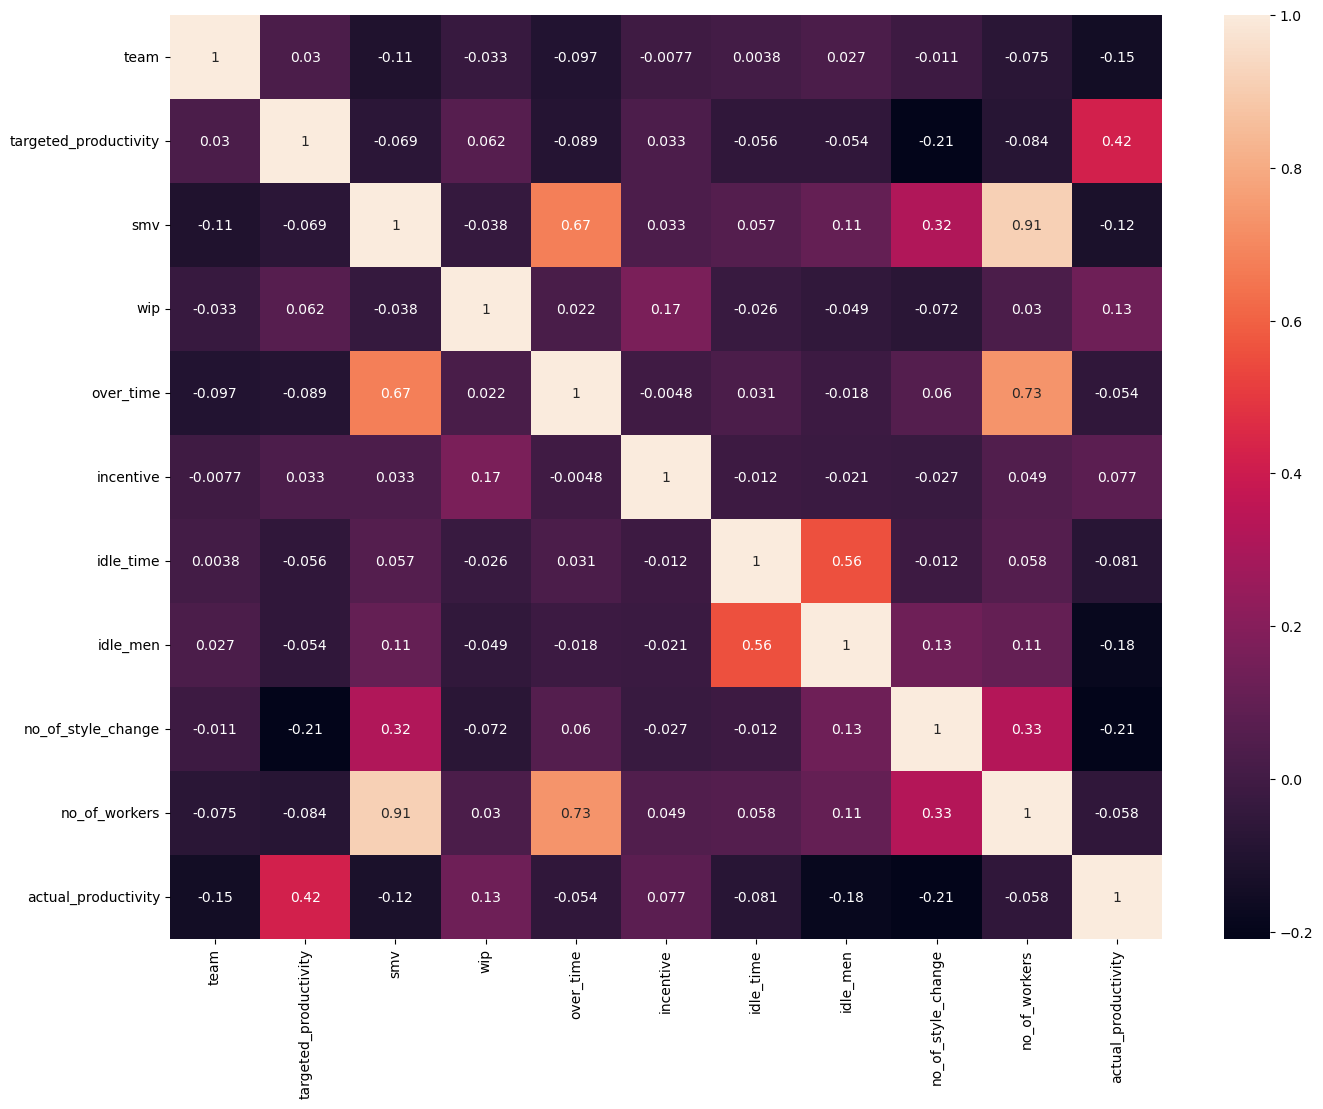

In [65]:
correlation=df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation, annot=True)

In [66]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

The problem here is that we have a finishing with space and a finishing without space. We should fix it. 

In [67]:
df["department"]=df["department"].str.strip()

In [68]:
df["department"].unique()

array(['sweing', 'finishing'], dtype=object)

In [69]:
df["department"].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

Due to the high number of missing data and the low correlation with both the productivity columns, I have decided to not include it.

In [70]:
df["productive"]=df["actual_productivity"]>df["targeted_productivity"]

In [71]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productive
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,True
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,True
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,True
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,True
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,True


In [72]:
df["quarter"]=df["quarter"].replace("Quarter5", "Quarter4")
df["quarter"]=df["quarter"].replace(["Quarter1","Quarter2","Quarter3","Quarter4"], [1,2,3,4])
df["quarter"]=df["quarter"].astype("int")

In [73]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productive
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,True
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,True
2,1/1/2015,1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,True
3,1/1/2015,1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,True
4,1/1/2015,1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,True


The Quarter 5 contained just 44 observations between 29th January to 31st, so it was decided to incorporate them in a quarter 4. 

In [74]:
cleaned_df=df[["quarter", "day", "team", "targeted_productivity", "smv", "over_time", "actual_productivity", "productive", "incentive"]]

In [75]:
cleaned_df.head()

,quarter,day,team,targeted_productivity,smv,over_time,actual_productivity,productive,incentive
0,1,Thursday,8,0.80,26.16,7080,0.940725,True,98
1,1,Thursday,1,0.75,3.94,960,0.886500,True,0
2,1,Thursday,11,0.80,11.41,3660,0.800570,True,50
3,1,Thursday,12,0.80,11.41,3660,0.800570,True,50
4,1,Thursday,6,0.80,25.90,1920,0.800382,True,50


In order to build the Tree, we use just the columns that seems to have an impact on the two productivity colomuns. 

Now, it's necessary to create some dummies, otherwise the tree would consider the value of columns order in a certain way (for example for the quarter column, it would think that quarter 4 is grater than quarter 1). 

In [76]:
cleaned_df=pd.concat([cleaned_df, pd.get_dummies(cleaned_df["quarter"], prefix="q")], axis=1)
cleaned_df=cleaned_df.drop("quarter", axis=1)

In [77]:
cleaned_df

,day,team,targeted_productivity,smv,over_time,actual_productivity,productive,incentive,q_1,q_2,q_3,q_4
0,Thursday,8,0.80,26.16,7080,0.940725,True,98,1,0,0,0
1,Thursday,1,0.75,3.94,960,0.886500,True,0,1,0,0,0
2,Thursday,11,0.80,11.41,3660,0.800570,True,50,1,0,0,0
3,Thursday,12,0.80,11.41,3660,0.800570,True,50,1,0,0,0
4,Thursday,6,0.80,25.90,1920,0.800382,True,50,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Wednesday,10,0.75,2.90,960,0.628333,False,0,0,1,0,0
1193,Wednesday,8,0.70,3.90,960,0.625625,False,0,0,1,0,0
1194,Wednesday,7,0.65,3.90,960,0.625625,False,0,0,1,0,0
1195,Wednesday,9,0.75,2.90,1800,0.505889,False,0,0,1,0,0


In [78]:
cleaned_df=pd.concat([cleaned_df, pd.get_dummies(cleaned_df["day"])], axis=1)
cleaned_df=cleaned_df.drop("day", axis=1)

In [79]:
cleaned_df

,team,targeted_productivity,smv,over_time,actual_productivity,productive,incentive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,8,0.80,26.16,7080,0.940725,True,98,1,0,0,0,0,0,0,1,0,0
1,1,0.75,3.94,960,0.886500,True,0,1,0,0,0,0,0,0,1,0,0
2,11,0.80,11.41,3660,0.800570,True,50,1,0,0,0,0,0,0,1,0,0
3,12,0.80,11.41,3660,0.800570,True,50,1,0,0,0,0,0,0,1,0,0
4,6,0.80,25.90,1920,0.800382,True,50,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,960,0.628333,False,0,0,1,0,0,0,0,0,0,0,1
1193,8,0.70,3.90,960,0.625625,False,0,0,1,0,0,0,0,0,0,0,1
1194,7,0.65,3.90,960,0.625625,False,0,0,1,0,0,0,0,0,0,0,1
1195,9,0.75,2.90,1800,0.505889,False,0,0,1,0,0,0,0,0,0,0,1


In [80]:
cleaned_df=pd.concat([cleaned_df, pd.get_dummies(cleaned_df["team"], prefix="team")], axis=1)
cleaned_df=cleaned_df.drop("team", axis=1)

In [81]:
cleaned_df.head()

,targeted_productivity,smv,over_time,actual_productivity,productive,incentive,q_1,q_2,q_3,q_4,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,0.80,26.16,7080,0.940725,True,98,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.75,3.94,960,0.886500,True,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.80,11.41,3660,0.800570,True,50,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.80,11.41,3660,0.800570,True,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.80,25.90,1920,0.800382,True,50,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
X=cleaned_df.drop(["actual_productivity", "productive"], axis=1)
y=cleaned_df["productive"]

In [83]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=417)

In [84]:
class_tree= DecisionTreeClassifier(max_depth=3, random_state=417)
class_tree.fit(X_train, y_train)
predictions= class_tree.predict(X_test)

In [85]:
accuracy_score(y_test, predictions)

0.8083333333333333

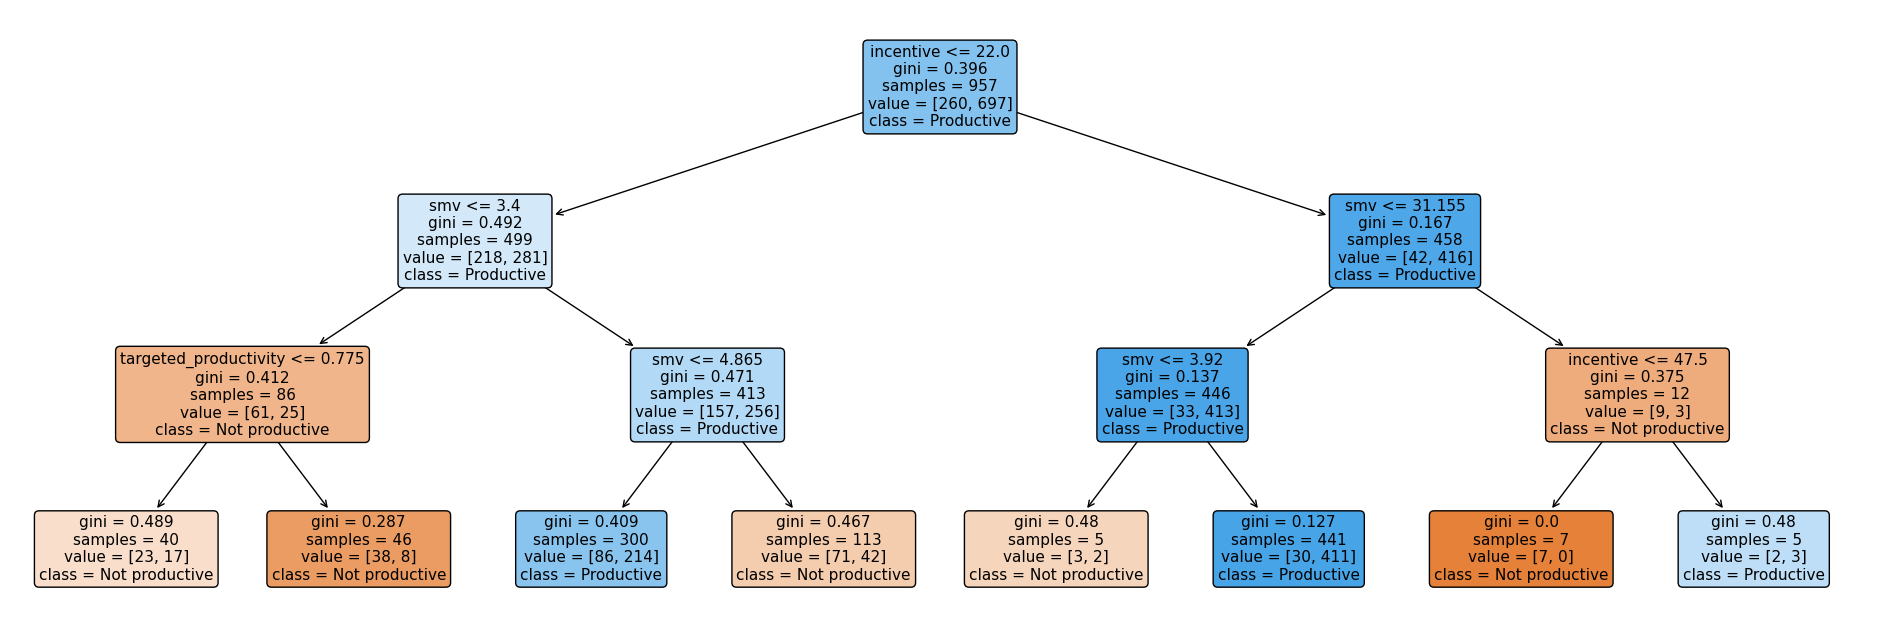

In [86]:
plt.figure(figsize=[24,8])
_=plot_tree(class_tree, feature_names=X.columns, class_names=["Not productive", "Productive"], filled=True, proportion=False, rounded=True, fontsize=11)
plt.show()

The most important columns for the splits are: incentives and smv (standard minute value or time allocated for a task). We have to consider that they are present in all the splits expect for one (targeted productivity). 
We can read the tree with an example. If the incetive is 20 and smv is 10. Well, in thiscase the split will conduct us to True (so to the left). Looking at the smv, this is greater than 3.4 so it is False (we go to the right). Then, looking again to the smv this is higher than 4.865 so it's False and we go to the right. In the end, the predicted class is Not productive. 

In [87]:
print(confusion_matrix(y_test, predictions))

[[ 33  35]
 [ 11 161]]


In [88]:
precision= 161/(161+35)
precision

0.8214285714285714

In [89]:
recall= 161/(161+11)
recall

0.936046511627907

In [90]:
f1_score=2*((precision*recall)/(precision+recall))
f1_score

0.8749999999999999

The values of accuracy, recall and precision are really high, so this is a good sign that our model works. 

In [91]:
scores=cross_val_score(class_tree, X,y, cv=5)
print("Cross validation scores are:", scores.round(2))

Cross validation scores are: [0.71 0.82 0.74 0.75 0.77]


In [92]:
print("Mean cross validation scores:", round(scores.mean(),2))

Mean cross validation scores: 0.76


In [93]:
other_scores= cross_validate(class_tree, X,y,cv=5, scoring=("precision", "recall", "f1"))
print("Precision scores:", other_scores["test_precision"].round(2))

Precision scores: [0.77 0.82 0.75 0.8  0.83]


In [94]:
print("Mean precision scores:", round(other_scores["test_precision"].mean(),2))

Mean precision scores: 0.8


In [95]:
print("Recall scores:", other_scores["test_recall"].round(2))

Recall scores: [0.85 0.95 0.98 0.87 0.84]


In [96]:
print("Mean recall scores:", round(other_scores["test_recall"].mean(),2))

Mean recall scores: 0.9


In [97]:
print("F1 scores:", other_scores["test_f1"].round(2))

F1 scores: [0.81 0.88 0.85 0.83 0.84]


In [98]:
print("Mean f1 scores:", round(other_scores["test_recall"].mean(),2))

Mean f1 scores: 0.9


The metrics are still high, even though the accuracy is a bit lower than before. 

We used the decision tree to understand which features have an higher predictive power. We ended up discovering that both incentive and smv are good. Considering that, the model is useful to understande which team is rpoductive and which not combining all the values we saw before. For instance, for a certain value of incentive and a certain value of smv, going through all the splits, we obtain a certain class. If the team is productive or not. 

In [99]:
random_for_class= RandomForestClassifier(oob_score=True, random_state=417)
random_for_class.fit(X,y)

RandomForestClassifier(oob_score=True, random_state=417)

In [101]:
score=random_for_class.oob_score_
score

0.8053467000835421

The out of the bag score is similar to the accuracy one of the decision tree. So, the model holds. 